In [301]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

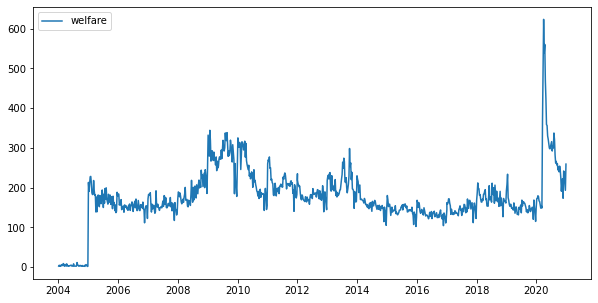

In [704]:
df=pd.read_excel("./data/Jobs.xlsx")
df=df.set_index("date")
welfare=["Social Security","Social Security Office Locations","Unemployment Benefits","Social Security Gov", 
         "Unemployment Office","Food Stamps", "Department of Labor"]
jobs=["Monster","Indeed","Jobs","Job Search",
         "Resume","Job Search Engines","Linkedin","Hotjobs","Cover Letter"]
welfare=df[welfare]
welfare.head()
jobs=df[jobs]
jobs.head()

jobs=pd.DataFrame(jobs.sum(axis=1),columns=["Jobs"])
welfare=pd.DataFrame(welfare.sum(axis=1),columns=["welfare"])
df=welfare.merge(jobs, left_index=True, right_index=True)
df.index = df.index -1 *pd.to_timedelta(1, unit='D')
plt.figure(figsize=(10, 5))
plt.plot(welfare)
plt.legend(welfare.columns)

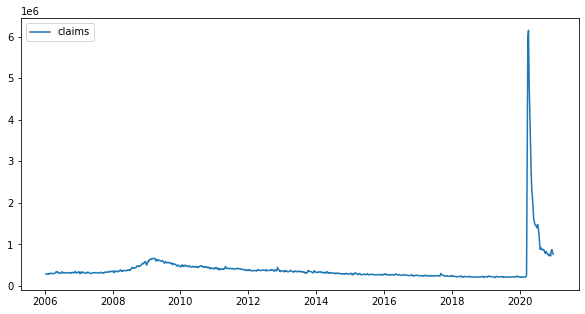

In [451]:
import datetime
unemployment=pd.read_excel("InitialClaims.xls")
t=unemployment['FRED Graph Observations'].tolist()
c=unemployment['Unnamed: 1'].tolist()
time=[]
claims=[]
for i in t:
    if isinstance(i, datetime.datetime):
        time.append(i)
for j in c:
    if isinstance(j,int):
        claims.append(j)
d={'claims':claims,'date': time}
unemployment=pd.DataFrame(d)
unemployment=unemployment.set_index("date")
unemployment.tail()
unemployment=unemployment.loc['2006-01-10':'2020-12-28']
plt.figure(figsize=(10, 5))
plt.plot(unemployment)
plt.legend(unemployment.columns)

In [452]:
def buildLaggedFeatures(s,lag=1,dropna=True):
    '''
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        return None
    if dropna:
        return res.dropna()
    else:
        return res 


In [558]:
mergedDf = df.merge(unemployment, left_index=True, right_index=True)
# mergedDf=unemployment
mergedDf = mergedDf.rename({'claims': 'claimsDifferenced'}, axis=1)

mergedDf=mergedDf[["claimsDifferenced","welfare","Jobs"]]#,"Linkedin","Indeed","Monster","Job Search","Jobs"]]#,"Jobs","unemployment office"]]#,,"Unemployment"]]#,"apply for unemployment","Rising Trends"]]
# dif=(mergedDf[["claimsDifferenced"]])
# dif= dif.rename(columns={"claimsDifferenced":"diffed"})
mergedDf=buildLaggedFeatures(mergedDf,lag=15)
# dif=dif.drop(columns=["diffed"])
# mergedDf = dif.merge(mergedDf, left_index=True, right_index=True)
mergedDf.head()


,claimsDifferenced,claimsDifferenced_lag1,claimsDifferenced_lag2,claimsDifferenced_lag3,claimsDifferenced_lag4,claimsDifferenced_lag5,claimsDifferenced_lag6,claimsDifferenced_lag7,claimsDifferenced_lag8,claimsDifferenced_lag9,...,Jobs_lag6,Jobs_lag7,Jobs_lag8,Jobs_lag9,Jobs_lag10,Jobs_lag11,Jobs_lag12,Jobs_lag13,Jobs_lag14,Jobs_lag15
date,,,,,,,,,,,,,,,,,,,,,
2006-04-29,321000,308000.0,299000.0,299000.0,291000.0,295000.0,303000.0,307000.0,302000.0,293000.0,...,436.708171,449.723996,478.656682,486.903482,436.566922,443.862771,498.055560,513.640205,461.235313,477.043152
2006-05-06,347000,321000.0,308000.0,299000.0,299000.0,291000.0,295000.0,303000.0,307000.0,302000.0,...,468.388557,436.708171,449.723996,478.656682,486.903482,436.566922,443.862771,498.055560,513.640205,461.235313
2006-05-13,335000,347000.0,321000.0,308000.0,299000.0,299000.0,291000.0,295000.0,303000.0,307000.0,...,424.828253,468.388557,436.708171,449.723996,478.656682,486.903482,436.566922,443.862771,498.055560,513.640205
2006-05-20,319000,335000.0,347000.0,321000.0,308000.0,299000.0,299000.0,291000.0,295000.0,303000.0,...,429.003020,424.828253,468.388557,436.708171,449.723996,478.656682,486.903482,436.566922,443.862771,498.055560
2006-05-27,330000,319000.0,335000.0,347000.0,321000.0,308000.0,299000.0,299000.0,291000.0,295000.0,...,434.246968,429.003020,424.828253,468.388557,436.708171,449.723996,478.656682,486.903482,436.566922,443.862771


In [559]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

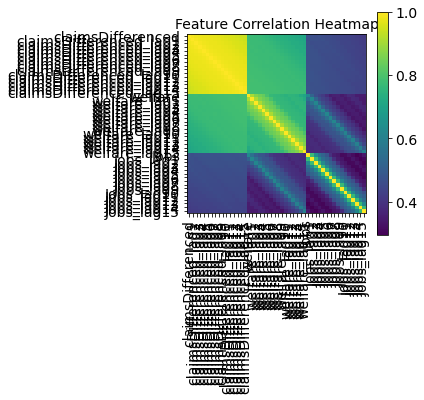

In [560]:
mergedDf=mergedDf.loc['2006-01-10':'2019-12-28']
# mergedDf=mergedDf.drop(columns=["File for unemplyment","Welfare & Unemployment"])
# mergedDf=mergedDf[["claimsDifferenced","Unemployment"]]
show_heatmap(mergedDf)

In [561]:
n = len(mergedDf)

train_df = mergedDf[0:int(n*0.7)]
val_df = mergedDf[int(n*0.7):int(n*0.9)]
test_df =mergedDf[int(n*0.9):]

num_features = mergedDf.shape[1]


In [562]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

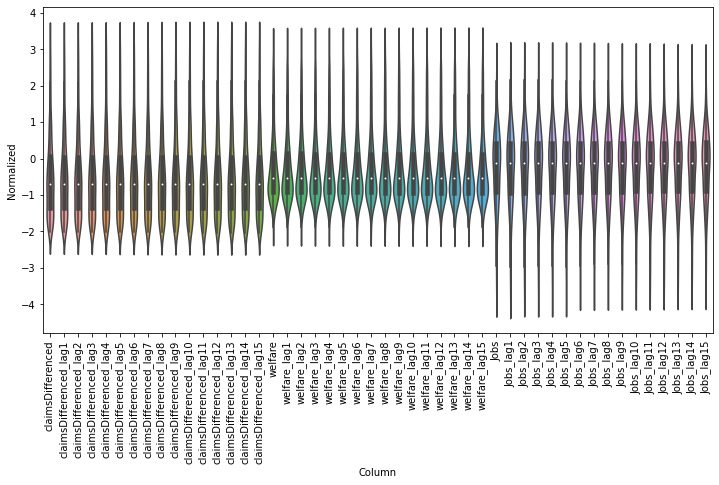

In [563]:
import seaborn as sns
df_std = (mergedDf - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(mergedDf.keys(), rotation=90)

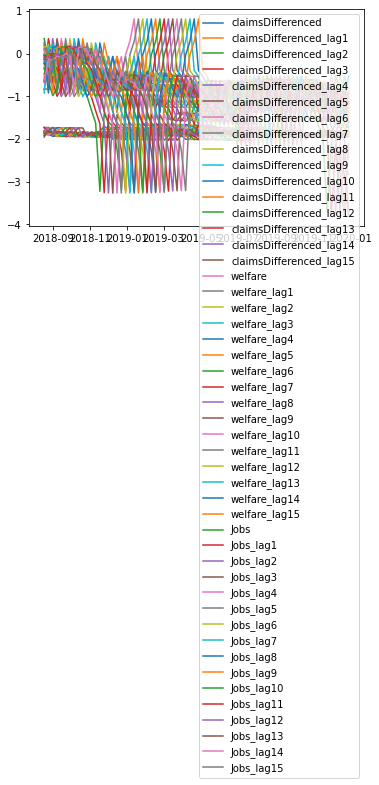

In [564]:
plt.plot(test_df)
plt.legend(train_df.columns)

In [331]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [332]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [333]:
def plot(self, model=None, plot_col='claimsDifferenced', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [334]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [335]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.test))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [336]:
import tensorflow as tf

In [584]:
single_step_window = WindowGenerator(
    input_width=12, label_width=12, shift=4*12,
    label_columns=['claimsDifferenced'])
single_step_window

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [48 49 50 51 52 53 54 55 56 57 58 59]
Label column name(s): ['claimsDifferenced']

In [585]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 12, 3)
Labels shape (batch, time, features): (32, 12, 1)


In [586]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [587]:
column_indices = {name: i for i, name in enumerate(mergedDf.columns)}
baseline = Baseline(label_index=column_indices['claimsDifferenced'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=["mape"])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 2ms/step - loss: 0.0565 - mape: 13.3422


In [488]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['claimsDifferenced'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['claimsDifferenced']

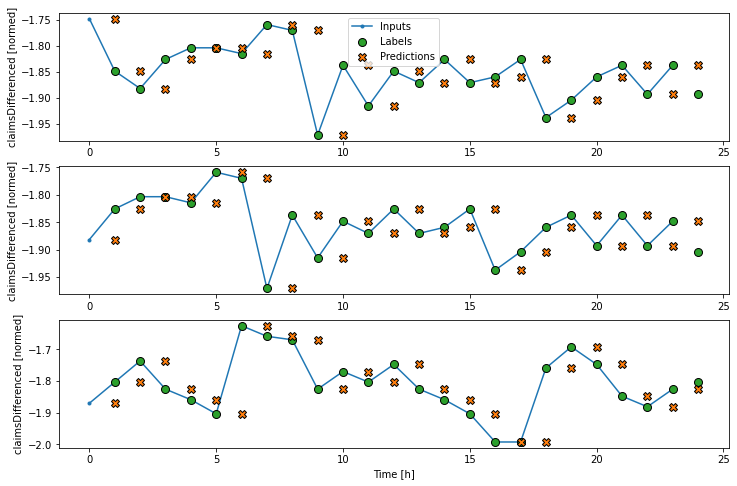

In [490]:
wide_window.plot(baseline)

In [500]:
# linear = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=32),
#     tf.keras.layers.Dense(units=1)
# ])
history = compile_and_fit(linear, single_step_window,patience=40)
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['claimsDifferenced'])
val_performance['linear'] = linear.evaluate(single_step_window.val)
performance['linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
17/17 [==============================] - 1s 15ms/step - loss: 0.0439 - mape: 78.0433 - val_loss: 0.0356 - val_mape: 9.9473
Epoch 2/200
17/17 [==============================] - 0s 10ms/step - loss: 0.0314 - mape: 62.9296 - val_loss: 0.0200 - val_mape: 7.2690
Epoch 3/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0321 - mape: 59.0776 - val_loss: 0.0155 - val_mape: 6.3234
Epoch 4/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0267 - mape: 42.7688 - val_loss: 0.0157 - val_mape: 6.4951
Epoch 5/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0319 - mape: 48.4267 - val_loss: 0.0150 - val_mape: 6.2594
Epoch 6/200
17/17 [==============================] - 0s 9ms/step - loss: 0.0328 - mape: 62.7167 - val_loss: 0.0145 - val_mape: 6.1867
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0321 - mape: 57.1225 - val_loss: 0.0138 - val_mape: 5.9491
Epoch 8/200
17/17 [==============================] - 0s 7ms/

Epoch 62/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0287 - mape: 52.1686 - val_loss: 0.0145 - val_mape: 6.1259
Epoch 63/200
17/17 [==============================] - 0s 9ms/step - loss: 0.0271 - mape: 53.5765 - val_loss: 0.0158 - val_mape: 6.5602
Epoch 64/200
17/17 [==============================] - 0s 9ms/step - loss: 0.0322 - mape: 45.6084 - val_loss: 0.0132 - val_mape: 5.8032
Epoch 65/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0293 - mape: 46.5305 - val_loss: 0.0154 - val_mape: 6.4334
Epoch 66/200
17/17 [==============================] - 0s 9ms/step - loss: 0.0306 - mape: 44.7676 - val_loss: 0.0152 - val_mape: 6.3291
Epoch 67/200
5/5 [==============================] - 0s 3ms/step - loss: 0.0141 - mape: 6.0257


In [492]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 3)
Output shape: (32, 1, 1)


In [499]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
            metrics=["mape"])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [368]:
dense = tf.keras.Sequential([
#     tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(units=128, 
                               
                                activation='relu'),
#     tf.keras.layers.Dense(units=256, 
                       
#                                   activation='relu'),
#     tf.keras.layers.Dense(units=256, 
                      
#                                   activation='relu'),
#     tf.keras.layers.Dense(units=256, 
            
#                                   activation='relu'),
    tf.keras.layers.Dense(1)
])

history = compile_and_fit(dense, single_step_window,patience=40)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
17/17 [==============================] - 1s 33ms/step - loss: 1.2772 - mape: 143.5878 - val_loss: 2.2424 - val_mape: 98.8994
Epoch 2/200
17/17 [==============================] - 0s 8ms/step - loss: 1.1647 - mape: 144.8517 - val_loss: 2.2253 - val_mape: 98.5049
Epoch 3/200
17/17 [==============================] - 0s 9ms/step - loss: 1.2032 - mape: 135.7843 - val_loss: 2.2095 - val_mape: 98.1378
Epoch 4/200
17/17 [==============================] - 0s 8ms/step - loss: 1.0993 - mape: 153.8883 - val_loss: 2.1937 - val_mape: 97.7699
Epoch 5/200
17/17 [==============================] - 0s 8ms/step - loss: 1.2135 - mape: 135.1627 - val_loss: 2.1781 - val_mape: 97.4053
Epoch 6/200
17/17 [==============================] - 0s 8ms/step - loss: 1.0435 - mape: 126.7035 - val_loss: 2.1618 - val_mape: 97.0233
Epoch 7/200
17/17 [==============================] - 0s 8ms/step - loss: 1.1151 - mape: 120.5255 - val_loss: 2.1463 - val_mape: 96.6598
Epoch 8/200
17/17 [============================

KeyboardInterrupt: 

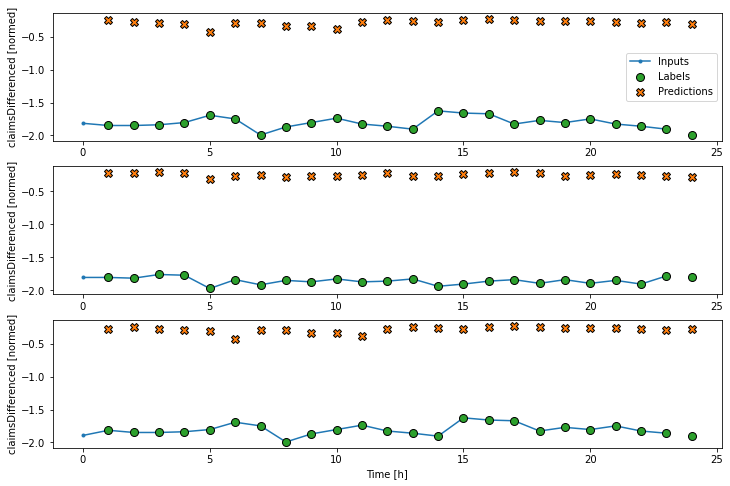

In [369]:
wide_window.plot(dense)

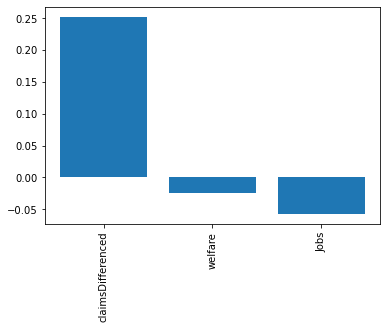

In [370]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [504]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mape'
metric_index = Dense.metrics_names.index('mape')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mse [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

ValueError: 'mape' is not in list

In [507]:
print(performance)

{'Baseline': [0.007353782653808594, 3.464927911758423]}


In [471]:
y_train=train_df["claimsDifferenced"]
x_train=train_df

In [472]:
y_val=val_df["claimsDifferenced"]
x_val=val_df

In [660]:
y_test=test_df["claimsDifferenced"]
x_test=test_df

date
2006-01-14   -1.078423
2006-01-21   -1.022641
2006-01-28   -1.111893
2006-02-04   -1.033797
2006-02-11   -0.933389
Name: claimsDifferenced, dtype: float64

In [698]:
from keras.preprocessing.sequence import TimeseriesGenerator
l=1
s=1
    
traingenerator = TimeseriesGenerator(x_train.values, y_train.values, length=l,stride=s, batch_size=16)
valgenerator = TimeseriesGenerator(x_val.values, y_val.values, length=l,stride=s, batch_size=16)
testgenerator = TimeseriesGenerator(x_test.values, 
                                    y_test.values, 
                                    length=l,stride=s, batch_size=1)
# for i in range(len(traingenerator)):
#     x,y=testgenerator[i]
#     print(x,y)
#     break

In [701]:
lstm_model = tf.keras.Sequential([
#     tf.keras.Input(shape=(2,3)),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, name='Hidden1'),
    tf.keras.layers.Dense(units=1, name='Hidden2'),
])
def compile_and_fit(model, traingenerator,valgenerator,patience=10):
  MAX_EPOCHS=300
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=["mape"])

  history = model.fit(traingenerator, epochs=MAX_EPOCHS,
                      validation_data=valgenerator,
                      callbacks=[early_stopping])
# print(lstm_model.output)
compile_and_fit(lstm_model,traingenerator,valgenerator)
print("hello")

Epoch 1/300
33/33 [==============================] - 3s 20ms/step - loss: 0.4356 - mape: 96.0546 - val_loss: 0.5347 - val_mape: 43.8855
Epoch 2/300
33/33 [==============================] - 0s 8ms/step - loss: 0.2243 - mape: 85.0311 - val_loss: 0.1428 - val_mape: 19.4266
Epoch 3/300
33/33 [==============================] - 0s 8ms/step - loss: 0.0885 - mape: 128.8045 - val_loss: 0.0714 - val_mape: 14.2564
Epoch 4/300
33/33 [==============================] - 0s 8ms/step - loss: 0.0488 - mape: 122.1152 - val_loss: 0.0890 - val_mape: 17.5240
Epoch 5/300
33/33 [==============================] - 0s 8ms/step - loss: 0.0535 - mape: 59.9690 - val_loss: 0.0706 - val_mape: 15.7175
Epoch 6/300
33/33 [==============================] - 0s 8ms/step - loss: 0.0377 - mape: 60.7877 - val_loss: 0.0321 - val_mape: 9.6856
Epoch 7/300
33/33 [==============================] - 0s 8ms/step - loss: 0.0404 - mape: 61.3336 - val_loss: 0.0336 - val_mape: 10.2696
Epoch 8/300
33/33 [==============================] - 

In [702]:
x=lstm_model.evaluate(testgenerator)

B=baseline.evaluate(testgenerator)
# print(x,testgenerator)
for i in range(len(testgenerator)):
    x,y=testgenerator[i]
#     print(x)
    break
# lstm_model.predict(np.array([x[0]]))

np.array([x[0]]).shape

71/71 [==============================] - 0s 2ms/step - loss: 0.0075 - mape: 3.4592


(1, 1, 48)

In [683]:
lstm_model.input

<KerasTensor: shape=(None, 20, 40) dtype=float32 (created by layer 'input_23')>